In [1]:
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Merger file comment từ các folder class

In [2]:
df = pd.DataFrame()
for cls in os.listdir("/data_science/data_science/data/v1/fingerprint/data_hung_response/fingerprint_labeled"):
    label = []
    df_cls = pd.read_excel("/data_science/data_science/data/v1/fingerprint/data_hung_response/fingerprint_labeled/{}/Comment.xlsx".format(cls))
    for i in df_cls.File:
        label.append(cls)
    df_cls["label"] = label
    df = pd.concat([df_cls,df])

# Check and convert comment về dạng chuẩn

In [3]:
df.Comment.unique()

array(['Không xác định được', 'OK', 'RL',
       'Ảnh bị mất dữ liệu, không xác định được chính xác',
       'Label đúng, thừa tâm và delta', 'Label đúng, thừa tâm',
       'Thừa tâm và delta + che khuất nên không xác định chính xác',
       'Label đúng, thừa delta',
       'Ảnh bị che nhiều, không xác định được chính xác',
       'Số đường vân từ tâm đến delta có thể lớn hơn 5 >>> UL/RL',
       'Hình xoay ngang, có thể sai', 'AS, thừa tâm và delta',
       'Hình bị mất dữ liệu', 'Sai', 'Đây là tâm WE, ko phải ARCH',
       'Tâm WE, ko phải ARCh', '1 phần UL< ko phải ARCH',
       'Tâm WE, ko phải ARCH', 'Không xác định được, giống tâm WE', 'UL'],
      dtype=object)

In [4]:
df.Comment = df.Comment.replace('Không xác định được',"NONE")
df.Comment = df.Comment.replace('Ảnh bị mất dữ liệu, không xác định được chính xác',"NONE")
df.Comment = df.Comment.replace('Thừa tâm và delta + che khuất nên không xác định chính xác',"NONE")
df.Comment = df.Comment.replace('Ảnh bị che nhiều, không xác định được chính xác',"NONE")
df.Comment = df.Comment.replace('Số đường vân từ tâm đến delta có thể lớn hơn 5 >>> UL/RL',"NONE")
df.Comment = df.Comment.replace('Hình xoay ngang, có thể sai',"NONE")
df.Comment = df.Comment.replace('Sai',"NONE")
df.Comment = df.Comment.replace('Hình bị mất dữ liệu',"NONE")
df.Comment = df.Comment.replace('Không xác định được, giống tâm WE',"NONE")


df.Comment = df.Comment.replace('Label đúng, thừa tâm và delta',"OK")
df.Comment = df.Comment.replace('Label đúng, thừa tâm',"OK")
df.Comment = df.Comment.replace('Label đúng, thừa delta',"OK")
df.Comment = df.Comment.replace('AS, thừa tâm và delta',"ARCH")
df.Comment = df.Comment.replace('Tâm WE, ko phải ARCh',"WE")
df.Comment = df.Comment.replace('Tâm WE, ko phải ARCH',"WE")
df.Comment = df.Comment.replace('Đây là tâm WE, ko phải ARCH',"WE")
df.Comment = df.Comment.replace('1 phần UL< ko phải ARCH',"UL")

In [5]:
df.Comment.unique()

array(['NONE', 'OK', 'RL', 'ARCH', 'WE', 'UL'], dtype=object)

# Nếu comment là oke thì predict đúng

In [6]:
for i in range(0,len(df)):
    if df.iloc[i,1]=="OK":
        df.iloc[i,1] = df.iloc[i,2]

# Tạo confution matrix

In [7]:
confusion_matrix = pd.crosstab(df['Comment'], df['label'], rownames=['True_label'], colnames=['Predict_label'])

In [8]:
confusion_matrix

Predict_label  ARCH  RL  UL  WCDI  WE  WPL  WST
True_label                                     
ARCH            114   0   0     0   0    0    0
NONE              9   2  12     4   4   17    2
RL                0   2   1     0   0    0    0
UL                1   4  10     0   0    0    0
WCDI              0   0   0     1   0    0    0
WE                3   0   0     0   6    0    0

#  Convert sang tỉ lệ %

In [9]:
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

/tmp/ipykernel_168693/1688737327.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]


In [10]:
confusion_matrix

Predict_label      ARCH        RL        UL  WCDI        WE   WPL   WST
True_label                                                             
ARCH           1.000000  0.000000  0.000000  0.00  0.000000  0.00  0.00
NONE           0.180000  0.040000  0.240000  0.08  0.080000  0.34  0.04
RL             0.000000  0.666667  0.333333  0.00  0.000000  0.00  0.00
UL             0.066667  0.266667  0.666667  0.00  0.000000  0.00  0.00
WCDI           0.000000  0.000000  0.000000  1.00  0.000000  0.00  0.00
WE             0.333333  0.000000  0.000000  0.00  0.666667  0.00  0.00

# Plot

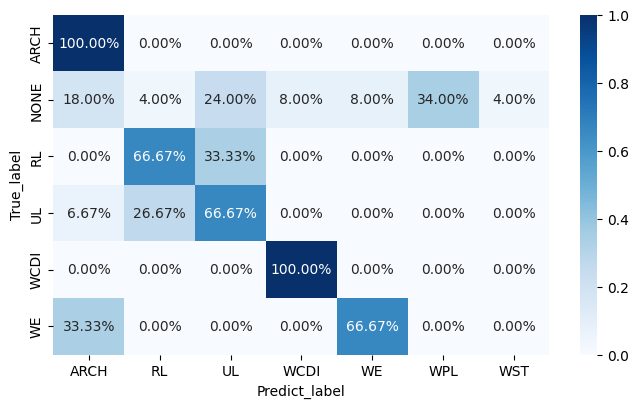

In [11]:
plt.figure(figsize = (8,4.5),dpi=100)
sns.heatmap(confusion_matrix, cmap="Blues", annot=True,fmt='.2%')
plt.show()

# Visualization wrong predict

In [ ]:
import cv2
from matplotlib import pyplot as plt

df_wrong = df[df['Comment'] != 'OK']
hong = []
for _, row in df_wrong.iterrows():
    img_path = fprint[row['File']]
    file_name = img_path.split('/')[-1]
    tmp = (img_path, 'True label: ' + row['Comment'], 'Predict label: ' + row['label'], file_name)
    hong.append(tmp)

rows = 2
columns = 3
for i in range(24, len(hong), rows*columns):
    fig = plt.figure(figsize=(15, 12))    
    
    for j in range(rows*columns):
        img_path, true_label, predict_label, file_name = hong[i+j]
        true_label = true_label[:40] + '\n' + true_label[40:] if len(true_label)>40 else true_label
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        fig.add_subplot(rows, columns, j+1)
        plt.imshow(img)
        plt.title(true_label + ' \n ' + predict_label + ' \n ' + file_name, loc='left')   
    
    plt.show()
    
    next_input = input()
    if next_input == 'n':
        continue
    else:
        break 